# Goal:
Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.


# Outcome:
The variables that are significant in predicting the demand for shared bikes (at least 3).


In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Reading Dataset

In [2]:
data = pd.read_csv('day - day.csv')
print(data.shape)
data.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 --- There are no null values.

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.dteday.dtype

dtype('O')

In [6]:
## convert dteday column in data type datetime
data['dteday'] =  pd.to_datetime(data['dteday'],format='%d-%m-%Y')
data.dteday.dtype

dtype('<M8[ns]')

In [7]:
## Extracting year and month from dteday
data['year'] = pd.DatetimeIndex(data.dteday).year
data['month'] = pd.DatetimeIndex(data.dteday).month

In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [9]:
## delete column yr and mnth form data
data.drop(['yr','mnth'], axis = 1, inplace = True)


In [10]:
data.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
data.drop(columns = ['instant','dteday'], inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  year        730 non-null    int64  
 13  month       730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [13]:
col_1 = ['season','month','holiday','weekday','workingday','weathersit']
for i in col_1:
    data[i] = data[i].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   holiday     730 non-null    category
 2   weekday     730 non-null    category
 3   workingday  730 non-null    category
 4   weathersit  730 non-null    category
 5   temp        730 non-null    float64 
 6   atemp       730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   casual      730 non-null    int64   
 10  registered  730 non-null    int64   
 11  cnt         730 non-null    int64   
 12  year        730 non-null    int64   
 13  month       730 non-null    category
dtypes: category(6), float64(4), int64(4)
memory usage: 51.3 KB


In [14]:
data.rename(columns = {'hum':'humidity','cnt':'count'},inplace = True)
data.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


# 2.  Visualisation

<AxesSubplot:xlabel='season', ylabel='count'>

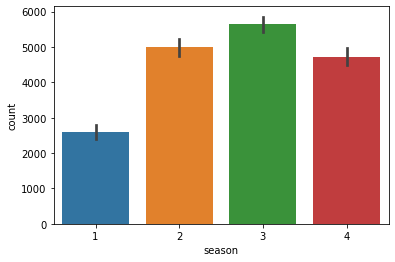

In [15]:
sns.barplot(x = 'season', y = 'count', data = data)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

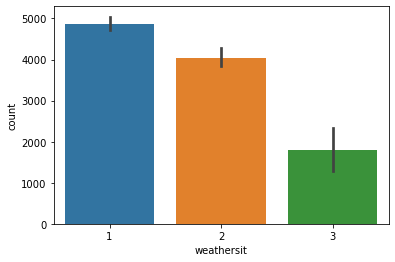

In [16]:
sns.barplot(x = 'weathersit', y = 'count', data = data)

<AxesSubplot:xlabel='workingday', ylabel='count'>

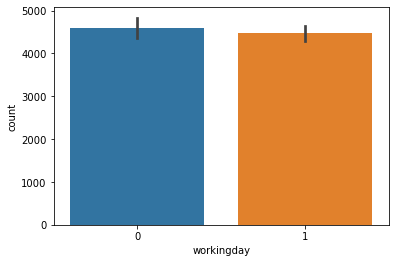

In [17]:
sns.barplot(x = 'workingday', y = 'count', data = data)

<AxesSubplot:xlabel='year', ylabel='count'>

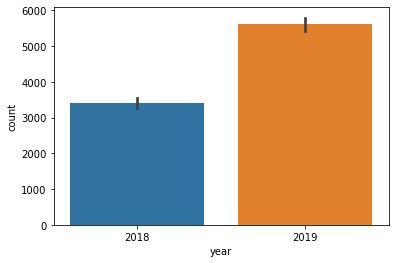

In [18]:
sns.barplot(x = 'year', y = 'count', data = data)

<AxesSubplot:xlabel='month', ylabel='count'>

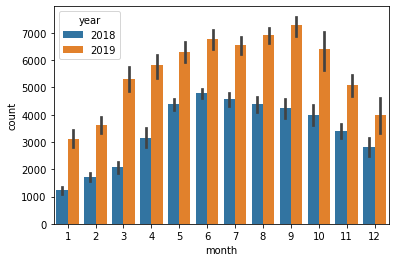

In [19]:
sns.barplot(x = 'month', y = 'count',hue = 'year', data = data)

<AxesSubplot:xlabel='weekday', ylabel='count'>

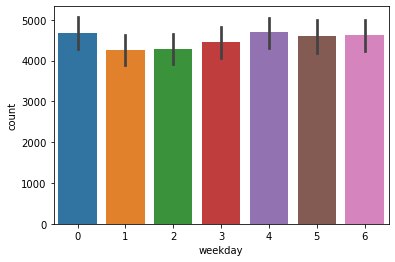

In [20]:
sns.barplot(x = 'weekday', y = 'count', data = data)

<AxesSubplot:xlabel='month', ylabel='count'>

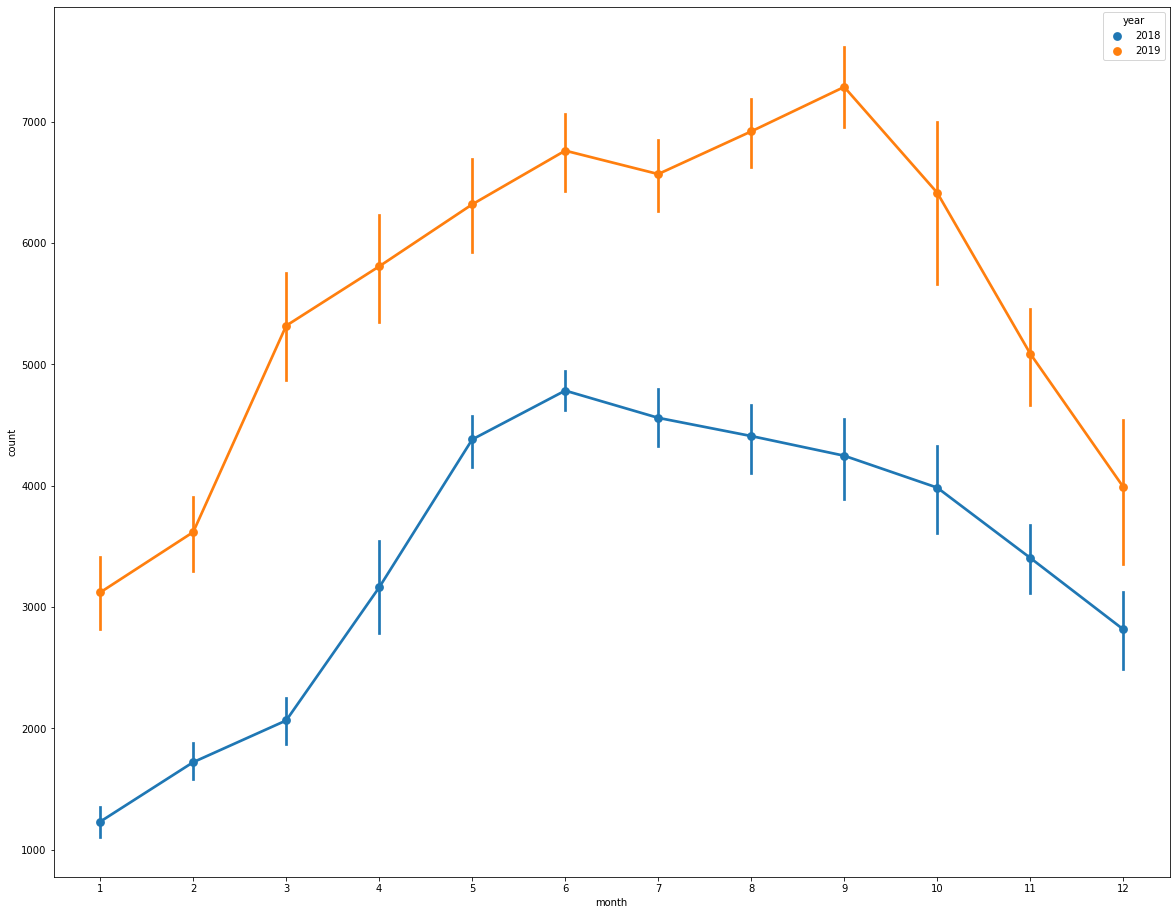

In [21]:
fig,ax = plt.subplots(figsize = (20,16))
sns.pointplot(x ='month', y = 'count', hue = 'year',data = data)

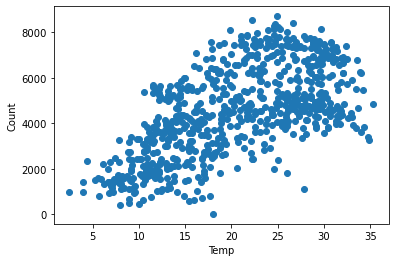

In [22]:
plt.scatter('temp','count',data = data)
plt.xlabel('Temp')
plt.ylabel('Count')
plt.show()

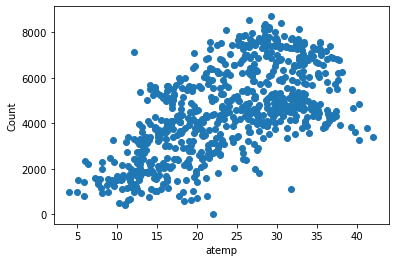

In [23]:
plt.scatter('atemp','count',data = data)
plt.xlabel('atemp')
plt.ylabel('Count')
plt.show()

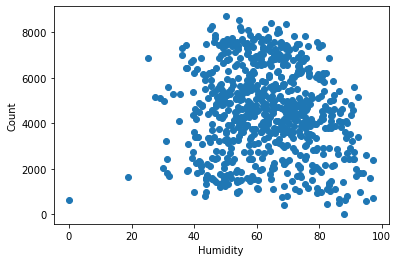

In [24]:
plt.scatter('humidity','count',data = data)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

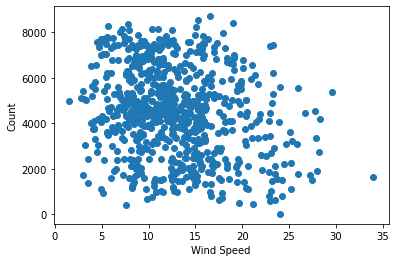

In [25]:
plt.scatter('windspeed','count',data = data)
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Density'>

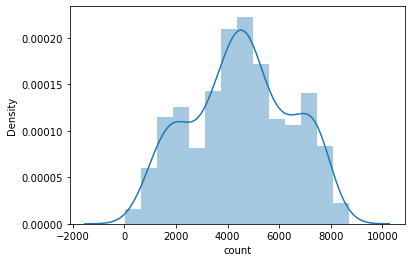

In [26]:
sns.distplot(data['count'])

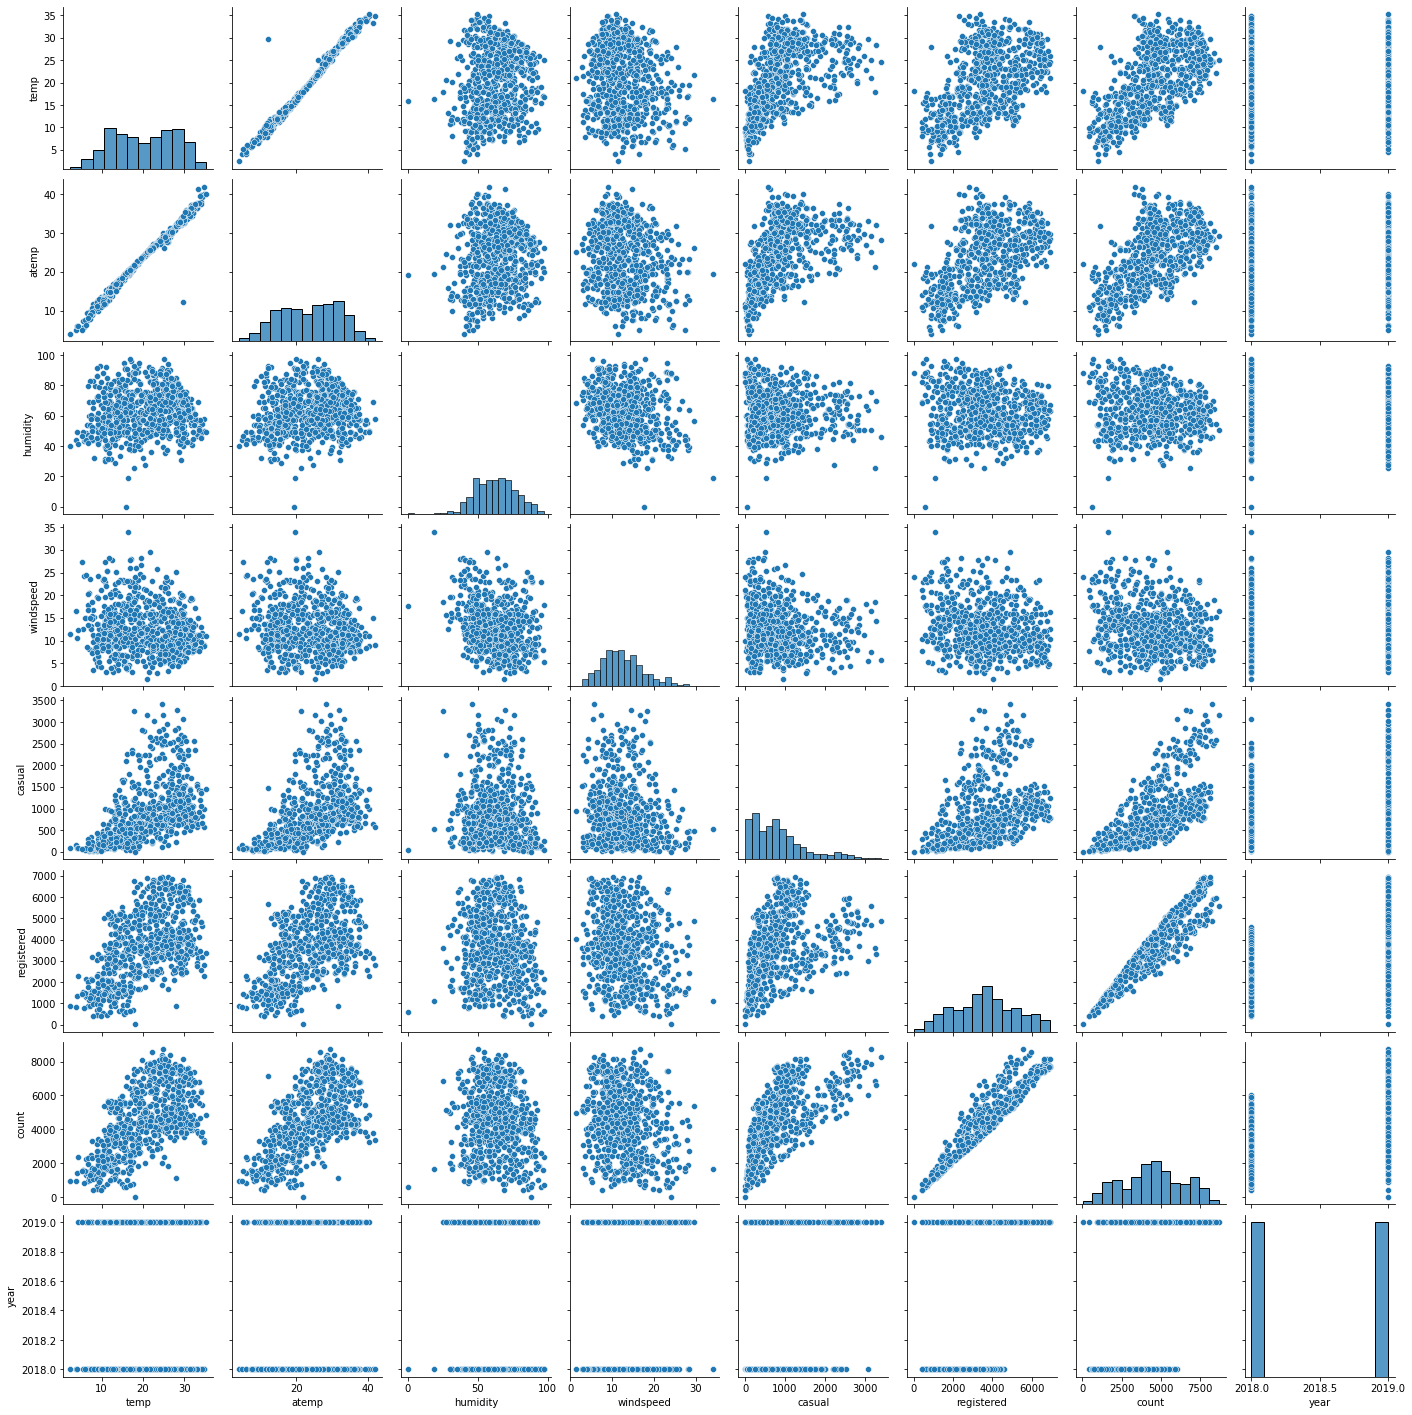

In [27]:
sns.pairplot(data)

<AxesSubplot:>

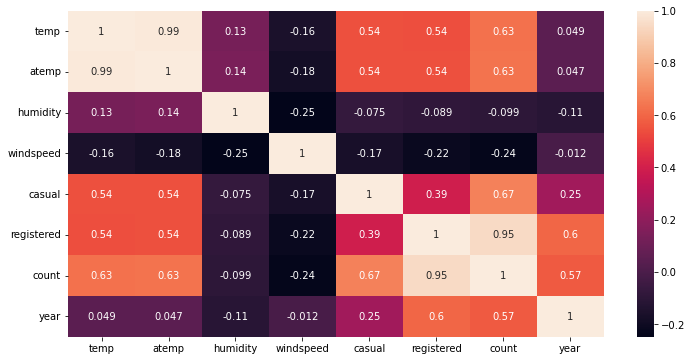

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

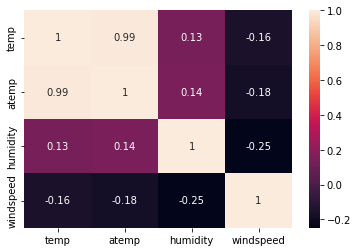

In [29]:
data1= data[['temp','atemp','humidity','windspeed']]
sns.heatmap(data1.corr(),annot=True)

In [30]:
data.drop('atemp',axis=1,inplace=True)
data.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,casual,registered,count,year,month
0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985,2018,1
1,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801,2018,1
2,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349,2018,1
3,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562,2018,1
4,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600,2018,1


# 3. Encoding

In [31]:
df = data
def one_hot_encoding(data,column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)],axis = 1)
    data = data.drop([column], axis = 1)
    return data
col_1 = ['season','month','weekday','workingday','weathersit']
for i in col_1:
    df = one_hot_encoding(df,i)
df.head()

,holiday,temp,humidity,windspeed,casual,registered,count,year,season_2,season_3,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,14.110847,80.5833,10.749882,331,654,985,2018,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,14.902598,69.6087,16.652113,131,670,801,2018,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,8.050924,43.7273,16.636703,120,1229,1349,2018,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,108,1454,1562,2018,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,9.305237,43.6957,12.522300,82,1518,1600,2018,0,0,...,0,0,0,0,0,1,0,1,0,0


In [32]:
df.drop(['holiday','casual','registered'],axis=1,inplace=True)
df.head()

,temp,humidity,windspeed,count,year,season_2,season_3,season_4,month_2,month_3,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,985,2018,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,2018,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,2018,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,2018,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# 4. Split the data for training and testing of model

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df,train_size = 0.7, test_size = 0.3, random_state = 100)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
num_var = ['temp', 'humidity','windspeed','count']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

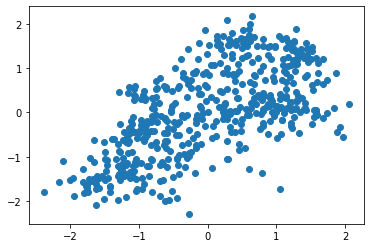

In [39]:
plt.scatter('temp','count',data=df_train)

In [40]:
y_train = df_train.pop('count')
x_train = df_train

# 5. Linear model

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [57]:
rfe = RFE(lr)
rfe = rfe.fit(x_train, y_train)


In [58]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 9),
 ('year', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('month_2', False, 11),
 ('month_3', False, 5),
 ('month_4', False, 8),
 ('month_5', False, 6),
 ('month_6', False, 7),
 ('month_7', False, 12),
 ('month_8', False, 3),
 ('month_9', True, 1),
 ('month_10', False, 4),
 ('month_11', False, 14),
 ('month_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 15),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [61]:
col = x_train.columns[rfe.support_]
col

Index(['temp', 'year', 'season_2', 'season_4', 'month_9', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [63]:
x_train_rfe = x_train[col]


In [64]:
import statsmodels.api as sm
x_tain_rfe = sm.add_constant(x_train_rfe)

In [65]:
lr = sm.OLS(y_train, x_train_rfe).fit()

In [66]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.547
Method:                 Least Squares   F-statistic:                              48.46
Date:                Fri, 29 Jul 2022   Prob (F-statistic):                    1.01e-79
Time:                        16:54:41   Log-Likelihood:                         -514.88
No. Observations:                 510   AIC:                                      1056.
Df Residuals:                     497   BIC:                                      1111.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp             0.6312      0.032     19.853      0.000       0.569       0.694
year         -1.988e-05   3.46e-05     -0.575      0.565   -8.78e-05     4.8e-05
season_2         0.3582      0.075      4.755      0.000       0.210       0.506
season_4         0.6262      0.075      8.320      0.000       0.478       0.774
month_9          0.4385      0.115      3.808      0.000       0.212       0.665
weekday_1       -0.5477      0.233     -2.353      0.019      -1.005      -0.090
weekday_2       -0.5212      0.225     -2.311      0.021      -0.964      -0.078
weekday_3       -0.4024      0.215     -1.869      0.062      -0.825       0.021
weekday_4       -0.3433      0.234     -1.469      0.143      -0.803       0.116
weekday_5       -0.4382      0.231     -1.899      0.058      -0.892       0.015
workingday_1     0.3679      0.212      1.734      0.084      -0.049       0.785
weathersit_2    -0.3613      0.064     -5.625      0.000      -0.487      -0.235
weathersit_3    -1.4967      0.181     -8.286      0.000      -1.852      -1.142
==============================================================================
Omnibus:                       20.886   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.478
Skew:                           0.041   Prob(JB):                      0.00875
Kurtosis:                       2.337   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
x_train1 = x_train_rfe.drop(['year','weekday_3','weekday_4','weekday_5','workingday_1'],1)

In [74]:
x_train2 = sm.add_constant(x_train1)
lr1 = sm.OLS(y_train, x_train2).fit()


In [75]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     78.17
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.40e-83
Time:                        17:11:41   Log-Likelihood:                -517.08
No. Observations:                 510   AIC:                             1052.
Df Residuals:                     501   BIC:                             1090.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0673      0.053     -1.281      0.201      -0.171       0.036
temp             0.6365      0.032     20.089      0.000       0.574       0.699
season_2         0.3654      0.075      4.861      0.000       0.218       0.513
season_4         0.6279      0.075      8.357      0.000       0.480       0.775
month_9          0.4253      0.115      3.700      0.000       0.199       0.651
weekday_1       -0.1541      0.084     -1.836      0.067      -0.319       0.011
weekday_2       -0.1424      0.084     -1.687      0.092      -0.308       0.023
weathersit_2    -0.3584      0.064     -5.605      0.000      -0.484      -0.233
weathersit_3    -1.5024      0.179     -8.370      0.000      -1.855      -1.150
==============================================================================
Omnibus:                       19.975   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.297
Skew:                           0.054   Prob(JB):                      0.00958
Kurtosis:                       2.347   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
x_train3 = x_train2.drop(['const','weekday_1','weekday_2'],1)
x_train4 = sm.add_constant(x_train3)
lr2 = sm.OLS(y_train, x_train4).fit()
lr2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     102.7
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           4.40e-84
Time:                        17:15:22   Log-Likelihood:                -519.74
No. Observations:                 510   AIC:                             1053.
Df Residuals:                     503   BIC:                             1083.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1138      0.049     -2.340      0.020      -0.209      -0.018
temp             0.6381      0.032     20.083      0.000       0.576       0.701
season_2         0.3654      0.075      4.846      0.000       0.217       0.513
season_4         0.6207      0.075      8.247      0.000       0.473       0.769
month_9          0.4297      0.115      3.728      0.000       0.203       0.656
weathersit_2    -0.3525      0.064     -5.500      0.000      -0.478      -0.227
weathersit_3    -1.4926      0.180     -8.299      0.000      -1.846      -1.139
==============================================================================
Omnibus:                       19.686   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.481
Skew:                           0.086   Prob(JB):                      0.00873
Kurtosis:                       2.355   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now all p-values are less than 0.05

# 

# variance inflation factor(VIF)

In [77]:
x_train_new = x_train4.drop('const',axis = 1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,features,VIF
4,weathersit_2,1.31
2,season_4,1.21
1,season_2,1.16
0,temp,1.13
3,month_9,1.13
5,weathersit_3,1.05


# 6. Residual analysis of train data

In [84]:
y_train_pred = lr2.predict(x_train4)

Text(0.5, 0, 'Errors')

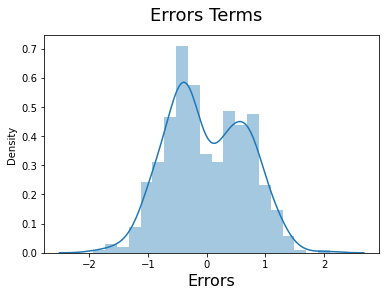

In [85]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Errors Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 16)

In [86]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [87]:
y_test = df_test.pop('count')
x_test = df_test

In [88]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

In [89]:
y_test_pred = lr2.predict(x_test_new)

Text(0, 0.5, 'Predictions')

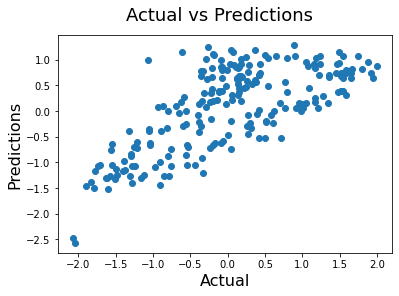

In [90]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=18)              
plt.xlabel('Actual', fontsize=16)                          
plt.ylabel('Predictions', fontsize=16)         

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.4941536521733255

# Three variables for predicting bike sharing

1. Temperature = 0.6381
2. Season_2 = 0.3654
3. weathersit_2 = -0.3525